# Algorithm Efficiency & Code Speed
Many computer science courses involve algorithm efficiency analysis. Here in IS590PR we want to make sure you're familiar with the concepts, common notation, and can evaluate efficiency for at least simple cases.

Note that **algorithm efficiency** a.k.a **algorithm complexity** is unrelated to which programming language, whether it was compiled, or what hardware the algorithm is running in.  Even though all of those considerations and several others will impact real performance of a program, the computational complexity is more an abstract mathematical description of the speed or memory requirements of an algorithm than a measurement.

In [1]:
import numpy as np
from time import process_time
import pandas as pd
%matplotlib inline

In [2]:
l3 = list(range(100))
l4 = list(range(1000))
l5 = list(range(10000))
l6 = list(range(100000))
l7 = list(range(1000000))
l8 = list(range(10000000))
l9 = list(range(100000000))

growing_lists = [l3, l4, l5, l6, l7, l8, l9]

In [3]:
a3  = np.arange(100)
a4  = np.arange(1000)
a5  = np.arange(10000)
a6  = np.arange(100000)
a7  = np.arange(1000000)
a8  = np.arange(10000000)
a9  = np.arange(100000000)

growing_arrays = [a3, a4, a5, a6, a7, a8, a9]

In [4]:
def time_a_function(function, data):
    """Iterate through the data samples list, recording performance of the function 
    with each sample.
    
    :param function: a function object
    :param data: a list of [list or np.array]
    :returns: pd.Series
    """
    results = {}       # create a dict of n vs. speed
    for item in data:  # loop through the data samples
        start_time = process_time()
        result = function(item)  # call the specified function with a sample from data
        elapsed_time = process_time() - start_time
        sample_size = len(item)
        print('With data size {:12d}, process run time was {:0.5f} sec.  Result: {}'.format(
            sample_size, elapsed_time, result))
        results[sample_size] = elapsed_time
    return pd.Series(results)

In [5]:
def python_sum(some_list):
    """Iterate through a list or array to compute the sum."""
    total = 0
    for x in some_list:
        total += x
    return total

## What is the algorithmic time complexity of the python_sum() function?

... discuss...

## Is it possible to write a different algorithm for summing a list or array of numbers that has a better Big-Ɵ time?

... discuss...


In [6]:
result = time_a_function(python_sum, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00009 sec.  Result: 499500
With data size        10000, process run time was 0.00047 sec.  Result: 49995000
With data size       100000, process run time was 0.00505 sec.  Result: 4999950000
With data size      1000000, process run time was 0.05479 sec.  Result: 499999500000
With data size     10000000, process run time was 0.51993 sec.  Result: 49999995000000
With data size    100000000, process run time was 5.46160 sec.  Result: 4999999950000000


[<matplotlib.text.Text at 0x256ec04e0>, <matplotlib.text.Text at 0x21ebebdd8>]

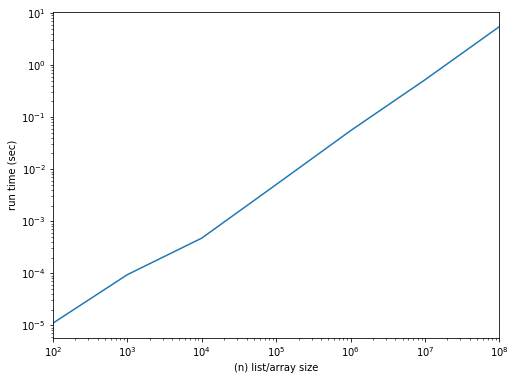

In [7]:
result.plot(use_index=True, loglog=True, figsize=(8,6)).set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

## Note that the sample data above was sequential integers. If we knew that were always the case, then we definitely can optimize it like this:

In [8]:
def sequence_sum(some_list):
    """Given a list or array **known** to contain a sequence of equally-spaced integers 
    in sorted order, return the sum."""
    item_count = len(some_list)
    first = some_list[0]
    last  = some_list[-1]
    if item_count % 2 == 0:  
        # there is an even number of items
        return item_count // 2 * (first + last)
    else:
        middle_value = some_list[(item_count - 1) // 2]
        return (item_count - 1) // 2 * (first + last) + middle_value

In [9]:
print(sequence_sum([1, 2, 3, 4]))  # An even number of items
print(sequence_sum([1, 2, 3]))     # An odd number of items
print(sequence_sum([2, 3, 4]))     # Starting at 2
print(sequence_sum([1, 4, 7, 10])) # A sequence that skips, but constant intervals
print(sequence_sum(a3))            # the array from 0 to 999

10
6
9
22
4950


# What is Big-Ɵ of sequence_sum() above?  

In [10]:
def sum_every_third_item(some_list):
    """Iterate through a list or array to compute the sum of one third the items, at index positions 2, 5, 8, ..."""
    total = 0
    for i in range(2, len(some_list), 3):
        total += some_list[i]
    return total

In [11]:
print(sum_every_third_item([1, 2, 3, 4, 5, 6, 7]))  # add 3 + 6
print(sum_every_third_item([8, 10, 2, 5, 2, 1]))    # add 2 + 1
print(sum_every_third_item([2, 3, 4]))              # add 4
print(sum_every_third_item(a3))            # the array from 0 to 999

9
3
4
1650


# What is Big-Ɵ of sum_every_third_item() above?  

In [12]:
result = time_a_function(sequence_sum, growing_lists)

With data size          100, process run time was 0.00000 sec.  Result: 4950
With data size         1000, process run time was 0.00002 sec.  Result: 499500
With data size        10000, process run time was 0.00000 sec.  Result: 49995000
With data size       100000, process run time was 0.00001 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00001 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00000 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.00001 sec.  Result: 4999999950000000


In [13]:
result = time_a_function(sum_every_third_item, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 1650
With data size         1000, process run time was 0.00005 sec.  Result: 166500
With data size        10000, process run time was 0.00035 sec.  Result: 16665000
With data size       100000, process run time was 0.00264 sec.  Result: 1666650000
With data size      1000000, process run time was 0.02991 sec.  Result: 166666500000
With data size     10000000, process run time was 0.28163 sec.  Result: 16666665000000
With data size    100000000, process run time was 2.93964 sec.  Result: 1666666650000000


# record times to measure the run times for *several different* sum functions as _n_ increases:

In [14]:
curves = {}

In [15]:
curves['python_sum'] = time_a_function(python_sum, growing_lists)  # python_sum() on a LIST

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00020 sec.  Result: 499500
With data size        10000, process run time was 0.00051 sec.  Result: 49995000
With data size       100000, process run time was 0.00591 sec.  Result: 4999950000
With data size      1000000, process run time was 0.05656 sec.  Result: 499999500000
With data size     10000000, process run time was 0.59702 sec.  Result: 49999995000000
With data size    100000000, process run time was 5.60065 sec.  Result: 4999999950000000


In [16]:
# use timing to validate the growth curve of run times as _n_ increases:
curves['python_sum_arr'] = time_a_function(python_sum, growing_arrays) # python_sum() on a Numpy NDARRAY

With data size          100, process run time was 0.00002 sec.  Result: 4950
With data size         1000, process run time was 0.00037 sec.  Result: 499500
With data size        10000, process run time was 0.00236 sec.  Result: 49995000
With data size       100000, process run time was 0.01083 sec.  Result: 4999950000
With data size      1000000, process run time was 0.10758 sec.  Result: 499999500000
With data size     10000000, process run time was 1.06023 sec.  Result: 49999995000000
With data size    100000000, process run time was 9.93752 sec.  Result: 4999999950000000


In [17]:
# Ignoring algorithmic complexity, compare the Numpy sum() function with 
# the pure Python loop above. 
curves['np.sum'] = time_a_function(np.sum, growing_arrays)

With data size          100, process run time was 0.00004 sec.  Result: 4950
With data size         1000, process run time was 0.00002 sec.  Result: 499500
With data size        10000, process run time was 0.00003 sec.  Result: 49995000
With data size       100000, process run time was 0.00041 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00087 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00731 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.07071 sec.  Result: 4999999950000000


## If the **algorithm** we have can't be improved further, but it's still too slow, then we can turn to other optimization techniques like selective compilation using Cython or Numba.
Note though that there are tradeoffs between them and they don't always speed things up. Also in many cases, Numba won't be able to compile at all.

In [18]:
%load_ext cython

In [19]:
%%cython
def cython_sum(arr):
    total = 0
    for x in arr:
        total += x
    return total

In [20]:
curves['cython_sum'] = time_a_function(cython_sum, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00005 sec.  Result: 499500
With data size        10000, process run time was 0.00025 sec.  Result: 49995000
With data size       100000, process run time was 0.00290 sec.  Result: 4999950000
With data size      1000000, process run time was 0.03246 sec.  Result: 499999500000
With data size     10000000, process run time was 0.33172 sec.  Result: 49999995000000
With data size    100000000, process run time was 3.22593 sec.  Result: 4999999950000000


In [21]:
import numba 

@numba.jit
def numba_sum(arr):
    total = 0
    for x in arr:
        total += x
    return total

In [22]:
curves['numba_sum'] = time_a_function(numba_sum, growing_arrays)

With data size          100, process run time was 0.11157 sec.  Result: 4950
With data size         1000, process run time was 0.00001 sec.  Result: 499500
With data size        10000, process run time was 0.00002 sec.  Result: 49995000
With data size       100000, process run time was 0.00008 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00059 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00620 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.05869 sec.  Result: 4999999950000000


In [23]:
# Construct a single DataFrame from the dictionary containing multiple Pandas Series:
df = pd.DataFrame(curves)
df

,cython_sum,np.sum,numba_sum,python_sum,python_sum_arr
100,0.000007,0.000040,0.111568,0.000008,0.000022
1000,0.000054,0.000022,0.000011,0.000201,0.000371
10000,0.000249,0.000030,0.000016,0.000511,0.002356
100000,0.002901,0.000411,0.000079,0.005907,0.010832
1000000,0.032457,0.000874,0.000588,0.056557,0.107575
10000000,0.331717,0.007308,0.006204,0.597022,1.060228
100000000,3.225932,0.070708,0.058695,5.600647,9.937521


# Plot 1 of comparative performance.
Because my sample sizes (n) were growing exponentially, we must use a logarithmic plot on x-axis or it'll skewed the lines to the left edge.  But notice that we can't distinguish their performance visually until we reached n=10,000,000.  So check the next plot.

[<matplotlib.text.Text at 0x25a326128>, <matplotlib.text.Text at 0x25a317f28>]

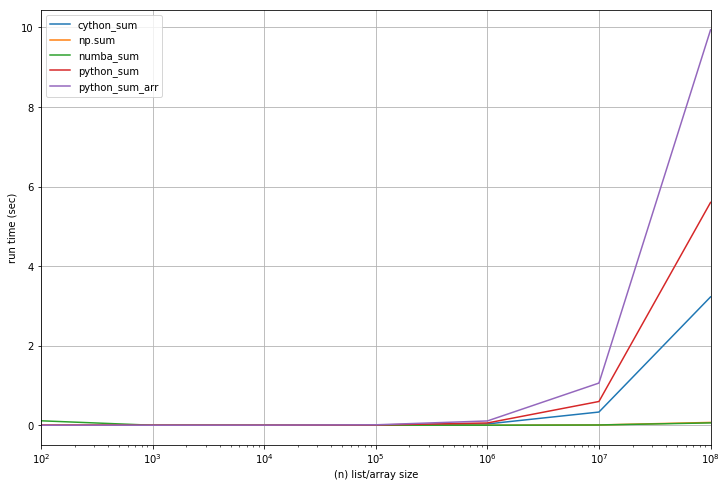

In [24]:
df.plot(use_index=True, logx=True, legend=True, grid=True, figsize=(12,8)).set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

# Plot 2 of comparative performance.
Because the run times are also generally growing exponentially between each sample, must *also* use a logarithmic plot on the y-axis to "straighten" that back out visually.

Same data as above, plotted with BOTH axes logarithmic, demonstrating confirmation 
that all the sum functions have linear complexity, a.k.a. Ɵ(n) 

###  The anomaly on the "numba_sum"...
where the first sample was very slow, is caused by the numba.jit "Just-In-Time" compiler analyzing and producing machine code.  If I re-run those calculations with the same Python kernel/interpreter session active, it will not have that delay.

[<matplotlib.text.Text at 0x25a2f6710>, <matplotlib.text.Text at 0x25a37c0b8>]

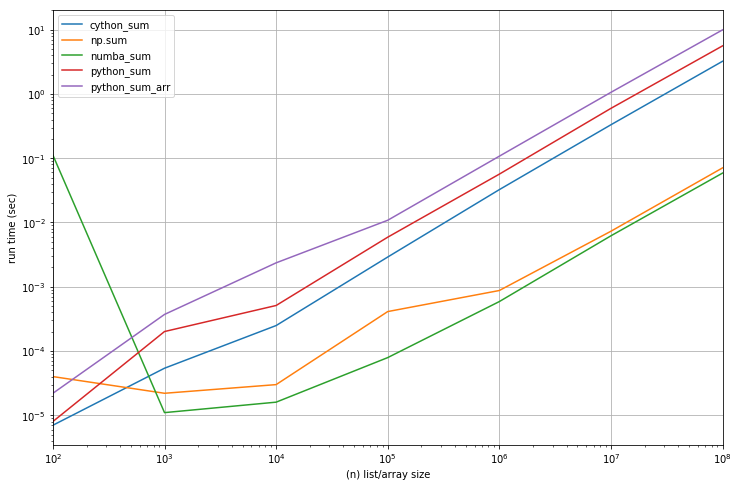

In [25]:
df.plot(use_index=True, loglog=True, legend=True, grid=True, figsize=(12,8)).set(
    xlabel='(n) list/array size', ylabel='run time (sec)')